In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from scipy.io import arff
import data_processing as dp
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore")

data = arff.loadarff("../data/3year.arff")
df = pd.DataFrame(data[0])
df_origin = df.copy()

In [ ]:
def SVM_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    # Training the SVM model
    svm_model = SVC(kernel='linear')  # You can choose different kernels based on your data
    svm_model.fit(X_train, y_train)

    # Predictions on the testing set
    y_pred_train = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)

    # Evaluating the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision_score_ = precision_score(y_test, y_pred_test)
    recall_score_ = recall_score(y_test, y_pred_test)

    print(f"precision_score: {precision_score_}")
    print(f"recall_score: {recall_score_}")

    return train_accuracy, test_accuracy

In [ ]:
train_test_dataset = dp.pre_process(df)  # with SMOTE
print(f"X_train.shape: {train_test_dataset[0].shape}")

To Do:
- check linear separability

In [ ]:
train_accuracy, test_accuracy = SVM_model(*train_test_dataset)
print(train_accuracy)
print(test_accuracy)

#kernel = rbf , [train, test] = [0.5304764630133066, 0.5147572199301809]
#kernel = linear, [train, test] = [0.537201316354271, 0.5728340209457315]

In [ ]:
best_train_test_dataset = dp.find_best_k_features_from_ANOVA(SVM_model, *train_test_dataset)
print(len(best_train_test_dataset[0].columns))
# Best k for train_accuracy: 23
# Best k for test_accuracy: 25

In [ ]:
SVM_model(*best_train_test_dataset)

['Callable', 'Color', 'DTreeVizAPI', 'DTreeVizRender', 'List', 'Mapping', 'NUM_BINS', 'ShadowDecTree', 'ShadowDecTreeNode', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_class_leaf_viz', '_class_split_viz', '_ctreeviz_bivar', '_ctreeviz_univar', '_draw_barh_chart', '_draw_legend', '_draw_piechart', '_draw_wedge', '_format_axes', '_get_leaf_target_input', '_get_num_bins', '_prop_size', '_regr_leaf_viz', '_regr_split_viz', '_rtreeviz_bivar_3D', '_rtreeviz_bivar_heatmap', '_rtreeviz_univar', '_set_wedge_ticks', 'add_classifier_legend', 'adjust_colors', 'explain_prediction_plain_english', 'explain_prediction_sklearn_default', 'is_numeric', 'matplotlib', 'model', 'myround', 'np', 'os', 'patches', 'pd', 'plt', 'rgb2hex', 'tempfile', 'tessellate', 'tree']
<class 'numpy.ndarray'>
<class 'list'>


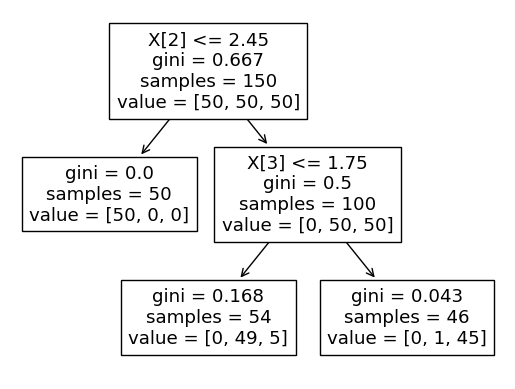

In [7]:
import graphviz.backend as be
from sklearn.datasets import *
import dtreeviz as dtree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image, display_svg, SVG


clas = DecisionTreeClassifier(max_depth=2)  
iris = load_iris()
print(dir(dtree.trees))


X_train = iris.data
print(type(X_train))
y_train = iris.target
print(type(iris.feature_names))

clas.fit(X_train, y_train)
from sklearn.tree import plot_tree
plot_tree(clas)

#1. Classification
viz = dtree.trees.model(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               )
viz